# Compute metrics across peak subsets

In [1]:
import sys
# append paths pointing to Data directory on your machine
sys.path.append('/home/katie/bp_repo/multitask_profile_model_SPI_GATA')

import pickle
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

import profile_models
import profile_performance
from profile_performance import load_metrics, compute_performance_metrics, log_performance_metrics
from all_functions import save_preds_by_subset

sys.path.append('/home/katie/bp_repo/reports/')
from util import import_profiles

In [7]:
# set variables
subsets_path_root = '/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/'
model_path_root = '/home/katie/bp_repo/pipeline_outputs/'
save_path_root = '/home/katie/bp_repo/reports/katie_notebooks/summer2022_analysis/preds_by_subset_jul9/'

model_paths = list(model_path_root + stem + '/model.state_dict' for stem in ['ctcf_chipseq_jul9',
                                                         'ctcf_cutnrun_jul9', 'fosl2_chipseq_jul9', 'fosl2_cutnrun_jul9'])
models = list(profile_models.ModelLoader(model_path, controls='chipseq' in model_path, num_tasks=1).load_model() for \
             model_path in model_paths)

tfs = ['CTCF'] * 2 + ['FOSL2'] * 2
assays = ['chip-seq', 'cutnrun'] * 2
controls = list(assay == 'chip-seq' for assay in assays)
save_paths = list(save_path_root + tfs[i] + '/' + assays[i] + '_model/' for i in range(len(tfs)))
peak_subsets = ['unique', 'shared']


path_ids = ['CTCF chip-seq model', 'CTCF cutnrun model', 'FOSL2 chip-seq model', 'FOSL2 cutnrun model']

keys = ['shared_chip_loader',
 'shared_cut_loader',
 'unique_chip_loader',
 'unique_cut_loader']

data_ids = ['true_counts', 'log_pred_counts', 'true_profs', 'log_pred_profs']
plt.rcParams['figure.dpi'] = 100

## Save preds by subset

In [10]:
# save preds by subset
for i in range(len(tfs)):
    model, tf, assay, control, save_path = models[i], tfs[i], assays[i], controls[i], save_paths[i]
    for peak_subset in peak_subsets:
        save_preds_by_subset(model, tf, assay, control, save_path, peak_subset, chrom_subset='test')

This is NOT the assay: cutnrun
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: CTCF_chip_unique_no_cut
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_no_cut
(4980, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/4 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: CTCF_cut_unique_no_chip
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_no_chip
(24246, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/17 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: cutnrun
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: CTCF_chip_unique_shared_cut
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_shared_cut
(30821, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/23 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: CTCF_cut_unique_shared_chip
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_shared_chip
(29979, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/22 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: chip-seq
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: CTCF_cut_unique_no_chip
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_no_chip
(24246, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/17 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: CTCF_chip_unique_no_cut
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_no_cut
(4980, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/4 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: chip-seq
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: CTCF_cut_unique_shared_chip
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_shared_chip
(29979, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/22 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: CTCF_chip_unique_shared_cut
CTCF
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_shared_cut
(30821, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/23 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: cutnrun
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: FOSL2_chip_unique_no_cut
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_no_cut
(6960, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: FOSL2_cut_unique_no_chip
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_no_chip
(20169, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/14 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: cutnrun
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: FOSL2_chip_unique_shared_cut
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_shared_cut
(26508, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/20 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/chip-seq/
TSV path: FOSL2_cut_unique_shared_chip
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_shared_chip
(25420, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/19 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: chip-seq
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: FOSL2_cut_unique_no_chip
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_no_chip
(20169, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/14 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: FOSL2_chip_unique_no_cut
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_no_cut
(6960, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Saving result to HDF5...
This is NOT the assay: chip-seq
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: FOSL2_cut_unique_shared_chip
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_shared_chip
(25420, 23)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5',
       'i6', 'i7', 'i8', 'i9', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/19 [00:00<?, ?it/s]

Saving result to HDF5...
Tasks path: /home/katie/bp_repo/research/data/cutnrun/
TSV path: FOSL2_chip_unique_shared_cut
FOSL2
/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_shared_cut
(26508, 14)
Index(['chrom', 'peak_start', 'peak_end', 'name', 'score', 'strand', 'signal',
       'pval', 'qval', 'summit_offset', 'i0', 'start', 'end', 'task'],
      dtype='object')


  0%|          | 0/20 [00:00<?, ?it/s]

Saving result to HDF5...


## Load in all test set predictions

In [11]:
# load in all test set predictions
all_preds_dict = {}

for i in range(len(save_paths)):
    path = save_paths[i]
    path_id = path_ids[i]
    preds_dict = {}
    
    # the surprisingly quick (few secs) actual preds loading
    for key in keys:
        file = h5py.File(f'{path}{key}.preds', 'r')
        coords = import_profiles(f'{path}{key}.preds')[2]
        preds_dict[key] = {'true_counts': file['predictions']['true_counts'], 
                           'log_pred_counts': file['predictions']['log_pred_counts'], 
                           'true_profs': file['predictions']['true_profs'],
                           'log_pred_profs': file['predictions']['log_pred_profs'], 
                           'coords': coords}
        
        # we need to subset to chr1, the test set
            # 1. take the coords, make into a DataFrame, subset to chr1, and get the indexes of the test coords
            # 2. use these indexes to subset pred_counts into the test profs
        df = pd.DataFrame(preds_dict[key]['coords']).reset_index()
        preds_dict[key]['coords_test'] = df[df.iloc[:,1] == 'chr1']
        preds_dict[key]['indexes_test'] = list(preds_dict[key]['coords_test']['index'])
        
        for data_id in data_ids:  # update all of the data to ONLY include test data
            preds_dict[key][data_id] = preds_dict[key][data_id][preds_dict[key]['indexes_test']]
    
    all_preds_dict[path_id] = preds_dict

Importing predictions:   0%|          | 0/6 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/6 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/1 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/6 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/6 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/1 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/2 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/4 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/2 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/4 [00:00<?, ?it/s]

## Save metrics (pickling)

In [12]:
# save metrics
# only need to run once
for i in range(len(path_ids)):
    path_id = path_ids[i]
    save_path = save_paths[i]
    for key in keys:
        preds_dict = all_preds_dict[path_id][key]
        true_profs, log_pred_profs, true_counts, log_pred_counts = \
        preds_dict['true_profs'], preds_dict['log_pred_profs'], preds_dict['true_counts'], preds_dict['log_pred_counts']
        metrics = profile_performance.compute_performance_metrics(
                true_profs, log_pred_profs, true_counts, log_pred_counts,
                prof_smooth_kernel_sigma=7, prof_smooth_kernel_width=81, print_updates=False
            )

        pickle.dump(profile_performance.log_performance_metrics(metrics), open(save_path + key + '_metrics.pkl', 'wb'))

	Test profile NLL: 212.976605
	Test profile cross entropy: 5.791260
	Test profile JSD: 0.120512
	Test profile Pearson: 0.796841
	Test profile Spearman: 0.595862
	Test profile MSE: 0.000002
	Test count Pearson: 0.386886
	Test count Spearman: 0.382056
	Test count MSE: 1.188107


/home/katie/bp_repo/multitask_profile_model_SPI_GATA/profile_performance.py:43: RuntimeWarning: invalid value encountered in true_divide
  cross_ent = (-log_prob_pows_sum) / trials


	Test profile NLL: 212.518237
	Test profile cross entropy: 5.787390
	Test profile JSD: 0.121126
	Test profile Pearson: 0.794557
	Test profile Spearman: 0.595289
	Test profile MSE: 0.000002
	Test count Pearson: 0.403550
	Test count Spearman: 0.402270
	Test count MSE: 1.206302
	Test profile NLL: 118.235532
	Test profile cross entropy: 6.021382
	Test profile JSD: 0.215517
	Test profile Pearson: 0.640114
	Test profile Spearman: 0.500139
	Test profile MSE: 0.000004
	Test count Pearson: 0.225358
	Test count Spearman: 0.172337
	Test count MSE: 0.251173
	Test profile NLL: 67.718938
	Test profile cross entropy: 6.780616
	Test profile JSD: 0.395471
	Test profile Pearson: 0.166229
	Test profile Spearman: 0.195328
	Test profile MSE: 0.000008
	Test count Pearson: 0.192545
	Test count Spearman: 0.218857
	Test count MSE: 0.896098
	Test profile NLL: 222.138688
	Test profile cross entropy: 4.832076
	Test profile JSD: 0.330868
	Test profile Pearson: 0.327574
	Test profile Spearman: 0.341298
	Test profil

## Load metrics into pretty dataframe :]

In [13]:
pickles = []
ids = []
for i in range(len(path_ids)):
    path_id = path_ids[i]
    save_path = save_paths[i]
    for key in keys:
        pickles.append(save_path + key + '_metrics.pkl')
        ids.append(path_id + ' on ' + ' '.join(key.split('_')[:-1]) + ' peaks')

In [9]:
# OLD, WITHOUT MULTI-INDEXING
metrics = load_metrics(pickles, ids, multiindexing=False)

metrics = metrics.append(load_metrics(['/home/katie/bp_repo/pipeline_outputs/ctcf_chipseq_jul6/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/ctcf_cutnrun_jul6/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_jul6/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/fosl2_cutnrun_jul6/metrics.pkl'],
             ['CTCF chip-seq model on all test peaks', 'CTCF cutnrun model on all test peaks', 
              'FOSL2 chip-seq model on all test peaks', 'FOSL2 cutnrun model on all test peaks'], multiindexing=False))

In [21]:
metrics = load_metrics(pickles, [path_ids, list(' '.join(key.split('_')) for key in keys)], multiindexing=True)
metrics = pd.concat([metrics, load_metrics(['/home/katie/bp_repo/pipeline_outputs/ctcf_chipseq_jul9/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/ctcf_cutnrun_jul6/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_jul6/metrics.pkl',
              '/home/katie/bp_repo/pipeline_outputs/fosl2_cutnrun_jul6/metrics.pkl'],
             [path_ids, ['all test peaks']], multiindexing=True)]).sort_index()
metrics = metrics.astype(float).round(2)

CTCF/chip-seq_model/shared_chip_loader_metrics.pkl
('CTCF chip-seq model', 'shared chip loader')


/CTCF/chip-seq_model/shared_cut_loader_metrics.pkl
('CTCF chip-seq model', 'shared cut loader')


CTCF/chip-seq_model/unique_chip_loader_metrics.pkl
('CTCF chip-seq model', 'unique chip loader')


/CTCF/chip-seq_model/unique_cut_loader_metrics.pkl
('CTCF chip-seq model', 'unique cut loader')


/CTCF/cutnrun_model/shared_chip_loader_metrics.pkl
('CTCF cutnrun model', 'shared chip loader')


9/CTCF/cutnrun_model/shared_cut_loader_metrics.pkl
('CTCF cutnrun model', 'shared cut loader')


/CTCF/cutnrun_model/unique_chip_loader_metrics.pkl
('CTCF cutnrun model', 'unique chip loader')


9/CTCF/cutnrun_model/unique_cut_loader_metrics.pkl
('CTCF cutnrun model', 'unique cut loader')


OSL2/chip-seq_model/shared_chip_loader_metrics.pkl
('FOSL2 chip-seq model', 'shared chip loader')


FOSL2/chip-seq_model/shared_cut_loader_metrics.pkl
('FOSL2 chip-seq model', 'shared cut loader')


OSL2/chip-seq_mod

In [15]:
def plot_metrics(tf, metric):
    subsets = ['shared chip loader', 'shared cut loader', 'unique chip loader', 'unique cut loader']
    
    labels = ['Shared ChIP-seq', 'Shared CUT&RUN', 'Unique ChIP-seq', 'Unique CUT&RUN']
    
    chip_rects_values = list(metrics.loc[(f'{tf} chip-seq model', subset), metric] for subset in subsets)
    cut_rects_values = list(metrics.loc[(f'{tf} cutnrun model', subset), metric] for subset in subsets)
    
    width = 0.4       # the width of the bars: can also be len(x) sequence
    ind = np.arange(len(labels))

    fig, ax = plt.subplots()

    # ChIP-seq model
    chip_rects = ax.bar(ind - width/2, chip_rects_values, width, label='ChIP-seq model')

    # CUT&RUN model
    cut_rects = ax.bar(ind + width/2, cut_rects_values, width, label='CUT&RUN model')

    ax.set_xticks(ind, labels, rotation=30)
    ax.set_xlabel('Peak subset')
    ax.set_ylabel(metric)
    ax.set_title(f'{tf} model performance on peak subsets')
    ax.legend()

    ax.bar_label(chip_rects, padding=1, fontsize=8)
    ax.bar_label(cut_rects, padding=1, fontsize=8)

    plt.show()

In [31]:
metrics.loc['FOSL2 chip-seq model':'FOSL2 cutnrun model', :]

Test profile NLL  \
FOSL2 chip-seq model all test peaks                277.32   
                     shared chip loader            304.00   
                     shared cut loader             306.81   
                     unique chip loader            184.21   
                     unique cut loader             138.70   
FOSL2 cutnrun model  all test peaks                 79.44   
                     shared chip loader            102.48   
                     shared cut loader             106.23   
                     unique chip loader             25.10   
                     unique cut loader              38.64   

                                         Test profile cross entropy  \
FOSL2 chip-seq model all test peaks                            6.51   
                     shared chip loader                        6.51   
                     shared cut loader                         6.51   
                     unique chip loader                        6.57   
                     unique cut loader                         6.84   
FOSL2 cutnrun model  all test peaks                            5.03   
                     shared chip loader                        4.85   
                     shared cut loader                         4.86   
                     unique chip loader                        5.10   
                     unique cut loader                         5.15   

                                         Test profile JSD  \
FOSL2 chip-seq model all test peaks                  0.12   
                     shared chip loader              0.11   
                     shared cut loader               0.11   
                     unique chip loader              0.16   
                     unique cut loader               0.22   
FOSL2 cutnrun model  all test peaks                  0.42   
                     shared chip loader              0.38   
                     shared cut loader               0.38   
                     unique chip loader              0.49   
                     unique cut loader               0.47   

                                         Test profile Pearson  \
FOSL2 chip-seq model all test peaks                      0.62   
                     shared chip loader                  0.63   
                     shared cut loader                   0.63   
                     unique chip loader                  0.52   
                     unique cut loader                   0.25   
FOSL2 cutnrun model  all test peaks                      0.22   
                     shared chip loader                  0.28   
                     shared cut loader                   0.28   
                     unique chip loader                  0.17   
                     unique cut loader                   0.18   

                                         Test profile Spearman  \
FOSL2 chip-seq model all test peaks                       0.53   
                     shared chip loader                   0.54   
                     shared cut loader                    0.54   
                     unique chip loader                   0.44   
                     unique cut loader                    0.27   
FOSL2 cutnrun model  all test peaks                       0.24   
                     shared chip loader                   0.32   
                     shared cut loader                    0.32   
                     unique chip loader                   0.20   
                     unique cut loader                    0.20   

                                         Test profile MSE  Test count Pearson  \
FOSL2 chip-seq model all test peaks                   0.0                0.60   
                     shared chip loader               0.0               -0.01   
                     shared cut loader                0.0               -0.01   
                     unique chip loader               0.0                0.05   
                     unique cut loader                0.0          

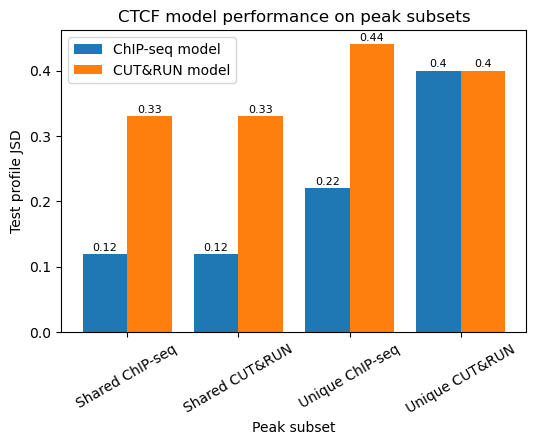

In [24]:
plot_metrics('CTCF', 'Test profile JSD')

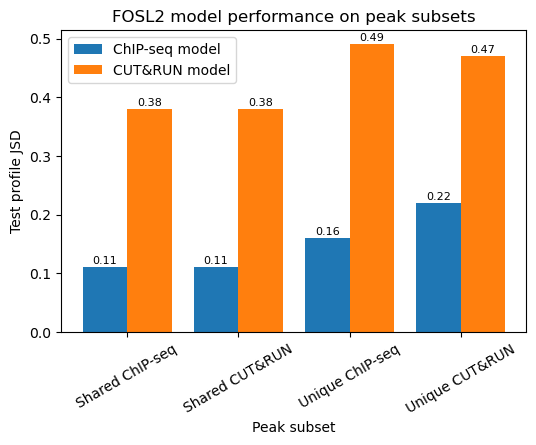

In [23]:
plot_metrics('FOSL2', 'Test profile JSD')

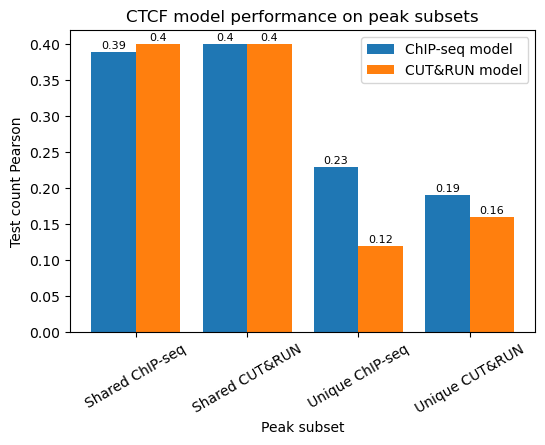

In [26]:
plot_metrics('CTCF', 'Test count Pearson')

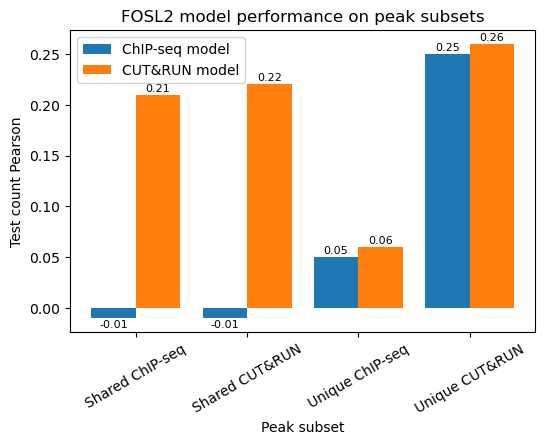

In [25]:
plot_metrics('FOSL2', 'Test count Pearson')

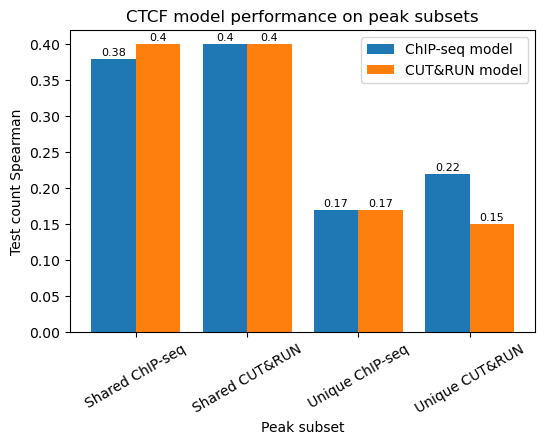

In [27]:
plot_metrics('CTCF', 'Test count Spearman')

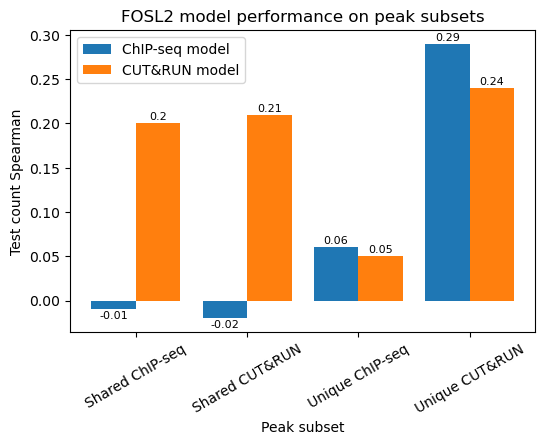

In [28]:
plot_metrics('FOSL2', 'Test count Spearman')